In [1]:
#Importation of all the neccessary packages needed for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json 
from textblob import TextBlob
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')
import re

In [3]:
# Twitter API credentials
consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

In [4]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Setting your access token and secret
auth.set_access_token(access_token, access_secret)

# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [5]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The Twitter user who we want to get tweets from
name = "AishaYesufu"
# Number of tweets to pull
tweetCount = 100

# Calling the user_timeline function with our parameters
results = api.user_timeline(id=name, count=tweetCount)

# foreach through all tweets pulled
i = 1
for tweet in results:
   # printing the text stored inside the tweet object
    print (str(i) + ') ' + tweet.text + '\n')
    i = i +1

1) Very true. Brute force, killing and maiming is not smartness. That's what terrorists do. https://t.co/8aQZ8gnMdm

2) The one we have in Aso villa is applauded for capacity to show his teeth!
#EndSars 
#EndPoliceBrutalityinNigeria… https://t.co/vyxySbkBty

3) If Nigeria was not a country where even military will deny its soldiers were killed and then bury them in secret bu… https://t.co/qyeuxzZINK

4) I actually see it from a different perspective. He needed something to bluff with and pretend he was not pressurise… https://t.co/UsImzZqD2G

5) RT @AJENews: Nigeria president warns protesters; fails to address shooting https://t.co/KQBBzHFMLG

6) RT @ibrahimu14: Person wey supervised OPC massacre back then in Lagos,with heavy position as secretary dey blame people for protesting,Crim…

7) RT @TheCharlesIsidi: .@falzthebahdguy is part of Nigeria's #EndSars protests. Is he afraid for his life? He says no. "We have a seriously h…

8) RT @tolaadesanmi: That infrastructure that FK and co bu

In [6]:
# creations of dataframe with a cloumn called tweet
df = pd.DataFrame([tweet.text for tweet in results], columns = ['Tweet'])
df.head()

,Tweet
0,"Very true. Brute force, killing and maiming is..."
1,The one we have in Aso villa is applauded for ...
2,If Nigeria was not a country where even milita...
3,I actually see it from a different perspective...
4,RT @AJENews: Nigeria president warns protester...


In [7]:
#clean up text
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+' , '', text) # removing @mentions
    text = re.sub(r'#', '', text) #removing #tag symbols
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # removing hyperlinks
    text = re.sub(r'[^0-9A-Za-z \t]', '', text)
    text = re.sub(r'\w+:\/\/\S+', '', text)
    return text

#cleaning the text
df['Tweet'] = df['Tweet'].apply(cleanTxt)

#Showing the cleaned text
df


,Tweet
0,Very true Brute force killing and maiming is n...
1,The one we have in Aso villa is applauded for ...
2,If Nigeria was not a country where even milita...
3,I actually see it from a different perspective...
4,Nigeria president warns protesters fails to a...
...,...
95,I am used to it Same people who used to say I ...
96,aka Commanderinchief right
97,About 20 citizens with dreams and ambitions w...
98,It is unbelievable I also heard on my programm...


In [8]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# create two new columns
df['Subjectivity'] = df['Tweet'].apply(getSubjectivity)
df['Polarity'] = df['Tweet'].apply(getPolarity)

#show the new dataframe with the new columns
df

,Tweet,Subjectivity,Polarity
0,Very true Brute force killing and maiming is n...,0.845000,0.455000
1,The one we have in Aso villa is applauded for ...,0.000000,0.000000
2,If Nigeria was not a country where even milita...,0.266667,-0.233333
3,I actually see it from a different perspective...,0.350000,0.000000
4,Nigeria president warns protesters fails to a...,0.300000,-0.500000
...,...,...,...
95,I am used to it Same people who used to say I ...,0.562500,-0.250000
96,aka Commanderinchief right,0.535714,0.285714
97,About 20 citizens with dreams and ambitions w...,0.050000,-0.100000
98,It is unbelievable I also heard on my programm...,1.000000,-0.250000


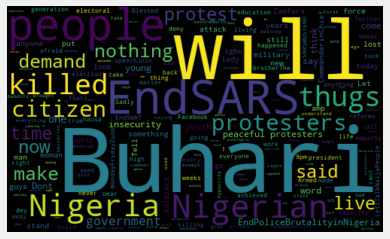

In [9]:
# Plot word cloud

allWords = ' '.join([twts for twts in df['Tweet']])
wordCloud = WordCloud(width = 500 , height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [10]:
# Create a function to compute negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
# Apply the getAnalysis function  
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show dataframe 
df

,Tweet,Subjectivity,Polarity,Analysis
0,Very true Brute force killing and maiming is n...,0.845000,0.455000,Positive
1,The one we have in Aso villa is applauded for ...,0.000000,0.000000,Neutral
2,If Nigeria was not a country where even milita...,0.266667,-0.233333,Negative
3,I actually see it from a different perspective...,0.350000,0.000000,Neutral
4,Nigeria president warns protesters fails to a...,0.300000,-0.500000,Negative
...,...,...,...,...
95,I am used to it Same people who used to say I ...,0.562500,-0.250000,Negative
96,aka Commanderinchief right,0.535714,0.285714,Positive
97,About 20 citizens with dreams and ambitions w...,0.050000,-0.100000,Negative
98,It is unbelievable I also heard on my programm...,1.000000,-0.250000,Negative


In [11]:
# Print all positive tweets
j = 1
sortedDF = df.sort_values(by='Polarity')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweet'][i])
        print()
        j=j+1

1) Very true Brute force killing and maiming is not smartness Thats what terrorists do 

2)  That infrastructure that FK and co built in 2 weeks how do we build on that Protests aside That thing was super effect

3)  What we achieved We created the single most unifying citizen experience in recent times Our generation took a stand amp hi

4)  Only young ns can transform   every sphere  politics NGOs health education judiciary security   needs young

5)  Where we go from here1 Vigilance on endsars amp EndPoliceBrutality 2 Build a collective for ACCOUNTABILITY Young

6)  A new political leadership would only come if we put the work in Theres a class in Nigeria that we cant win without

7) maina Look what we have done guys do not despair The unity achieved is something we all should be proud of It is not over t

8) hachi Absolutely EndSARS

9) Dear YouthYou had the power to make Buhari get off his high horse and listen to you and like a petulant child forc 

10)  A certain govt official d

In [12]:
# Print all Negative tweets
j = 1
sortedDF = df.sort_values(by= ['Polarity'], ascending = 'False')
for i in range(0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweet'][i])
        print()
        j=j+1

1) If Nigeria was not a country where even military will deny its soldiers were killed and then bury them in secret bu 

2)  Nigeria president warns protesters fails to address shooting 

3)  Person wey supervised OPC massacre back then in Lagoswith heavy position as secretary dey blame people for protestingCrim

4)   is part of Nigerias EndSars protests Is he afraid for his life He says no We have a seriously h

5) Nothing wrong with his memory He simply has no heart EndSARS 

6)   We demand justice for the brutally murdered by  We call on the    to

7) We made progress since you recognise there is carnage You usually will deny such because you have to defend the in 

8) Sadly so We are merely surviving 

9)    Blessed is he who expects nothing for he shall never be disappointed I was not expecting anything

10) Not a word from Buhari  about EndSars protesters killed Not a word about citizens killed in ZamfaraYou 

11) What happened to Buharis tears They dried up He can no longer cry 

In [13]:
#plot polatrity and Subjectivity

#plt.figure(figsize= (8,6))
#for i in range(0, df.shape[0]):
    #plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color = 'Red')
   # plt.title('Sentiment Analysis of @AishaYesufu Twitter handle')
   #plt.xlabel('Polarity')
   # plt.ylabel('Subjectivity')
   #plt.show()

In [14]:
#get percentage positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweet']
round(ptweets.shape[0]/df.shape[0]*100, 1)

35.0

In [15]:
#get percentage Negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweet']
round(ntweets.shape[0]/df.shape[0]*100, 1)

30.0

In [16]:
#get percentage Neutral tweets
ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweet']
round(ntweets.shape[0]/df.shape[0]*100, 1)

35.0

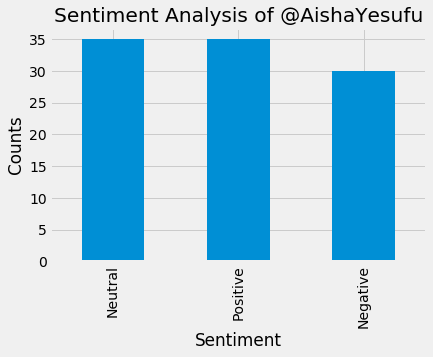

In [17]:
# show value count
df['Analysis'].value_counts

#plot the visual conts
plt.title('Sentiment Analysis of @AishaYesufu')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar') 
plt.show()